#Tema 12

In [3]:
import folium

# pip install folium
# !pip install folium

In [4]:
# Definir punto central del mapa
# direccion GPS    X.xxxx - Y.yyyyy   (Latitud, Longitud)
cr = [9.937679, -84.109143]  # Estadio Nacional

In [12]:
# Crear un mapa
mapa = folium.Map(location=cr,zoom_start=16)
mapa

In [13]:
# Crear un mapa
mapa2 = folium.Map(location=cr,zoom_start=16)

# Crear los marcadores
# Marcador Ubicacion [Lat,Lng], Texto Popup, texto tooltip
folium.Marker([9.93652292240305, -84.05342836357967],popup="UCR",tooltip="Click para ver nombre").add_to(mapa2)
folium.Marker([9.857867514022162, -83.91301920285713],popup="ITCR",tooltip="Click para ver el nombre").add_to(mapa2)

mapa2

In [19]:
# Ejemplo de Erupciones de Volcanes

import pandas as pd

df = pd.read_csv("/content/volcano-events.csv",usecols=["Name","Year","Month", "Day","Latitude","Longitude"],dtype={"Year":"Int16","Month":"Int16","Day": "Int16"})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       876 non-null    Int16  
 1   Month      745 non-null    Int16  
 2   Day        685 non-null    Int16  
 3   Name       876 non-null    object 
 4   Latitude   876 non-null    float64
 5   Longitude  876 non-null    float64
dtypes: Int16(3), float64(2), object(1)
memory usage: 28.4+ KB


In [22]:
df.tail()

Year  Month  Day       Name  Latitude  Longitude
872  2022     12    4     Semeru    -8.108    112.922
873  2023      1   31        Epi   -16.680    168.370
874  2023      7    7     Bagana    -6.137    155.196
875  2023     12    3     Marapi    -0.380    100.474
876  2023     12   18  Reykjanes    63.817    -22.717

In [28]:
# creamos una columna tipo fecha
UnionValores = df.Day.astype(str) + "/" +  df.Month.astype(str) + "/" + df.Year.astype(str)

df["timestamp"] = pd.to_datetime(UnionValores,errors="coerce")

/tmp/ipython-input-28-2686832162.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["timestamp"] = pd.to_datetime(UnionValores,errors="coerce")


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       876 non-null    Int16         
 1   Month      745 non-null    Int16         
 2   Day        685 non-null    Int16         
 3   Name       876 non-null    object        
 4   Latitude   876 non-null    float64       
 5   Longitude  876 non-null    float64       
 6   timestamp  635 non-null    datetime64[ns]
dtypes: Int16(3), datetime64[ns](1), float64(2), object(1)
memory usage: 35.2+ KB


In [31]:
df.tail()

Year  Month  Day       Name  Latitude  Longitude  timestamp
872  2022     12    4     Semeru    -8.108    112.922 2022-04-12
873  2023      1   31        Epi   -16.680    168.370 2023-01-31
874  2023      7    7     Bagana    -6.137    155.196 2023-07-07
875  2023     12    3     Marapi    -0.380    100.474 2023-03-12
876  2023     12   18  Reykjanes    63.817    -22.717 2023-12-18

In [32]:
# eliminamos los valores na
df = df.dropna()

In [33]:
# Eliminamos los columnas de origen year, month y day
df = df.drop(columns=["Year","Month","Day"])

In [36]:
df.head()

Name  Latitude  Longitude  timestamp
30   Vesuvius    40.821     14.426 1979-08-25
144  La Palma    28.570    -17.830 1677-11-22
145     Zukur    14.020     42.750 1679-09-21
146  Vesuvius    40.821     14.426 1682-12-08
148  Vesuvius    40.821     14.426 1690-03-02

In [37]:
# Obtener solo una fila por volcan
df = df.groupby(["Name","Latitude","Longitude"])["timestamp"].max()

In [38]:
df.head()

Name            Latitude  Longitude
Adatarayama      37.647   140.281     1997-09-15
Agung           -8.343    115.508     1963-05-16
Aira             31.593   130.657     2013-04-09
Akagisan         36.560   139.193     1947-09-16
Akita-Yakeyama   39.964   140.757     1986-08-05
Name: timestamp, dtype: datetime64[ns]

In [39]:
df = df.reset_index()

In [40]:
df.head()

Name  Latitude  Longitude  timestamp
0     Adatarayama    37.647    140.281 1997-09-15
1           Agung    -8.343    115.508 1963-05-16
2            Aira    31.593    130.657 2013-04-09
3        Akagisan    36.560    139.193 1947-09-16
4  Akita-Yakeyama    39.964    140.757 1986-08-05

In [48]:
import folium
import datetime

mapa3 = folium.Map(location=cr,zoom_start=16)

for index,row in df.iterrows():
  #print(row.Name)
  #print(row.Latitude)
  #print(row.Latitude)

  if row.timestamp > datetime.datetime(year=1999,month=1,day=1):
    icon = folium.Icon(color="red",icon="fire",prefix="fa")
  else:
    icon = folium.Icon(color="gray",icon="ok")

  lat_lng = row.Latitude,row.Longitude
  folium.Marker(lat_lng,popup=row.timestamp,tooltip=row.Name,icon=icon).add_to(mapa3)

mapa3


# Mapa de Calor

In [49]:
import folium
from folium.plugins import HeatMap

In [51]:
mapa4 = folium.Map(location=cr,zoom_start=16)

lats_longs = [
                [38.27312, -98.5821872,0.5], # Kansas
                [34.395342, -111.763275,0.6], # Arizona
                [37.5726028, -85.1551411,0.9], # Kentucky
                [32.3293809, -83.1137366,0.1], # Georgia
                [40.0796606, -89.4337288,0.4], # Illiniois
            ]

HeatMap(lats_longs).add_to(mapa4)

mapa4

# Geocoder - Geocodificacion

In [71]:
location = "Colosseo, Italia"

from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="bytescout", timeout=None)

resultado = geolocator.geocode(query = location)

print(resultado.latitude,resultado.longitude)

mapa5 = folium.Map(location=cr,zoom_start=16)
folium.Marker([resultado.latitude,resultado.longitude],popup=location,tooltip="Click Here").add_to(mapa5)
mapa5

41.8909421 12.491903


In [72]:
import json
with open("CRI_provincias.geojson", encoding="utf-8") as archivo:
    geoinfo = json.load(archivo)

In [73]:
mapa6 = folium.Map(location=cr,zoom_start=16)

cp = folium.Choropleth(geo_data=geoinfo).add_to(mapa6)

mapa6

In [77]:
df2 = pd.DataFrame({"provincia":["San José", "Alajuela", "Cartago", "Puntarenas", "Heredia", "Limón", "Guanacaste"],
                   "poblacion":[13458750, 1716286, 1432395, 357483, 354732, 23393095, 20064238]})

df2

provincia  poblacion
0    San José   13458750
1    Alajuela    1716286
2     Cartago    1432395
3  Puntarenas     357483
4     Heredia     354732
5       Limón   23393095
6  Guanacaste   20064238

In [78]:
mapa8 = folium.Map(location=cr, zoom_start=8, min_zoom=7, max_zoom=10, dragging=True)

cp2 = folium.Choropleth(
    geo_data=geoinfo,
    data=df2,
    columns=df2.columns,
    key_on="feature.properties.NAME_1",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Población (Total Reportado)",
).add_to(mapa8)

mapa8

# Tablas pivote

In [79]:
import pandas as pd
gastos = pd.DataFrame({'Month': ["January", "January", "January", "January",
                                  "February", "February", "February", "February",
                                  "March", "March", "March", "March"],
                   'Category': ["Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment",
                                "Transportation", "Grocery", "Household", "Entertainment"],
                   'Amount': [74., 235., 175., 100., 115., 240., 225., 125., 90., 260., 200., 120.]})

gastos

Month        Category  Amount
0    January  Transportation    74.0
1    January         Grocery   235.0
2    January       Household   175.0
3    January   Entertainment   100.0
4   February  Transportation   115.0
5   February         Grocery   240.0
6   February       Household   225.0
7   February   Entertainment   125.0
8      March  Transportation    90.0
9      March         Grocery   260.0
10     March       Household   200.0
11     March   Entertainment   120.0

In [80]:
pivote = gastos.pivot(index="Month",columns="Category",values="Amount")
pivote

Category  Entertainment  Grocery  Household  Transportation
Month                                                      
February          125.0    240.0      225.0           115.0
January           100.0    235.0      175.0            74.0
March             120.0    260.0      200.0            90.0

In [81]:
pivote2 = pivote.melt(var_name="Category",value_name='Amount')
pivote2

Category  Amount
0    Entertainment   125.0
1    Entertainment   100.0
2    Entertainment   120.0
3          Grocery   240.0
4          Grocery   235.0
5          Grocery   260.0
6        Household   225.0
7        Household   175.0
8        Household   200.0
9   Transportation   115.0
10  Transportation    74.0
11  Transportation    90.0

In [82]:
#Forma 1 - Codificacion Ordinal

usuarios = pd.DataFrame({"edad":[19,21,20,22,18,24],
                         "altura":[160, 163, 176, 178, 170, 166],
                         "ejercicio":["frecuente", "normal", "infrecuente","frecuente", "nunca", "normal"],})

usuarios

edad  altura    ejercicio
0    19     160    frecuente
1    21     163       normal
2    20     176  infrecuente
3    22     178    frecuente
4    18     170        nunca
5    24     166       normal

In [83]:
# Usar un diccionario para reemplazar los valores
reemplazo = {"nunca":0, "infrecuente":1, "normal":2, "frecuente":3}

In [84]:
usuarios.ejercicio = usuarios.ejercicio.replace(reemplazo)
usuarios

/tmp/ipython-input-84-3907940616.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  usuarios.ejercicio = usuarios.ejercicio.replace(reemplazo)


edad  altura  ejercicio
0    19     160          3
1    21     163          2
2    20     176          1
3    22     178          3
4    18     170          0
5    24     166          2

In [85]:
# Forma 2 - One-Hot Encoding / Dummies

libros = pd.DataFrame({"genero":["ciencia ficcion", "fantasia", "tecnico", "ciencia ficcion", "ciencia ficcion", "fantasia"],
                       "num_paginas":[120, 320, 150, 200, 210, 190],
                       "num_copias":[2,3,1,4,2,2]})
libros

genero  num_paginas  num_copias
0  ciencia ficcion          120           2
1         fantasia          320           3
2          tecnico          150           1
3  ciencia ficcion          200           4
4  ciencia ficcion          210           2
5         fantasia          190           2

In [86]:
dummies_genero = pd.get_dummies(libros.genero) * 1
dummies_genero

ciencia ficcion  fantasia  tecnico
0                1         0        0
1                0         1        0
2                0         0        1
3                1         0        0
4                1         0        0
5                0         1        0

In [87]:
libros = pd.concat([libros,dummies_genero],axis=1)
libros

genero  num_paginas  num_copias  ciencia ficcion  fantasia  \
0  ciencia ficcion          120           2                1         0   
1         fantasia          320           3                0         1   
2          tecnico          150           1                0         0   
3  ciencia ficcion          200           4                1         0   
4  ciencia ficcion          210           2                1         0   
5         fantasia          190           2                0         1   

   tecnico  
0        0  
1        0  
2        1  
3        0  
4        0  
5        0

In [88]:
libros = libros.drop("genero",axis=1)
libros

num_paginas  num_copias  ciencia ficcion  fantasia  tecnico
0          120           2                1         0        0
1          320           3                0         1        0
2          150           1                0         0        1
3          200           4                1         0        0
4          210           2                1         0        0
5          190           2                0         1        0

# Redes Reuronales
## Convetir Grados C a F

In [90]:
import tensorflow as tf
import numpy as np

In [97]:
Valores_Entrada = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
Valores_Salida = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [107]:
#Receta de varios pasos

# Paso 1 - Definir las capas

# capa = tf.keras.layers.Dense(units=1,input_shape=[1])

# Con mas capas 31 neuronas
entrada = tf.keras.layers.Dense(units=10, input_shape=[1])
oculta1 = tf.keras.layers.Dense(units=10)
oculta2 = tf.keras.layers.Dense(units=10)
salida = tf.keras.layers.Dense(units=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
# Paso 2 - El modelo

# modelo = tf.keras.Sequential([capa])

modelo = tf.keras.Sequential([entrada,oculta1,oculta2, salida])

In [109]:
# Pase 3 - Compilar el modelo

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [110]:
# Paso 4 - Entrenamiento

print("Comenzando entrenamiento...")
historial = modelo.fit(Valores_Entrada, Valores_Salida, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


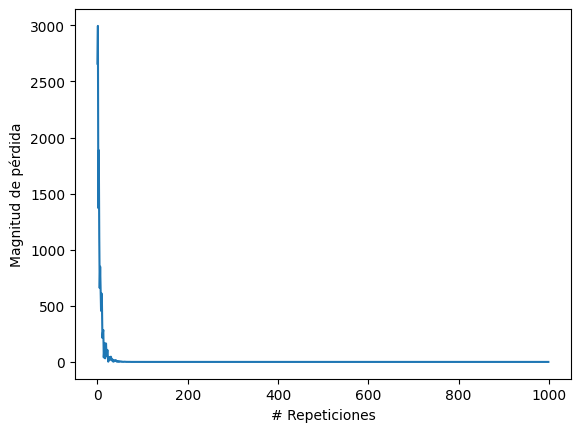

In [111]:
# Paso 5 - Revisar la perdida
import matplotlib.pyplot as plt
plt.xlabel("# Repeticiones")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [113]:
# Paso 6 - Etapa de prueba

entrada = np.array([8])
resultado = modelo.predict(entrada.reshape(-1, 1))
print("El resultado es " + str(resultado[0][0]) + " fahrenheit!")

# Ronda 1
# 15 ---> 59 (58.90 ~ 0.1)
# 8 ----> 46 (46.31 ~ 0.31)

# Ronda 2
# 15 ---> 59 (58.92 ~ 0.08)
# 8 ----> 46 (46.33 ~ 0.33)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
El resultado es 46.33612 fahrenheit!


In [114]:
# Paso 7 - Realizar una prediccion

entrada = np.array([50])
resultado = modelo.predict(entrada.reshape(-1, 1))
print("El resultado es " + str(resultado[0][0]) + " fahrenheit!")

# 50 ----> 122 (121.83 ~ 0.17)

# 50 ----> 122 (121.85 ~ 0.15)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
El resultado es 121.850006 fahrenheit!


In [115]:
# Formula  F = C * 1.800000 + 32.00000

#capa.get_weights()

pesos = modelo.layers[0].get_weights()
pesos

[array([[ 0.5851082 , -0.08180183, -0.07616324, -0.11331792, -0.09393474,
         -0.19815868, -0.12362879,  0.05077618, -0.10904041, -0.18440756]],
       dtype=float32),
 array([ 2.0515254 , -1.6445471 ,  0.863333  ,  1.2969608 , -1.6646185 ,
        -1.9841579 , -0.10984666,  1.9644003 , -2.0704095 , -1.0954435 ],
       dtype=float32)]